In [5]:
df = pd.read_csv(r'/home/student/Music/25_dataset/gym.csv')
df1 = pd.read_csv(r'/home/student/Music/25_dataset/gym.csv')
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


NAIVE BAYES Classification
Train Accuracy: 94.29 %
Test Accuracy: 97.78 %
Classification Report(Naive Bayes):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


SVM classification with different C Values:
c=0.01 : Train Accuracy = 60.95%, Test Accuracy = 55.56%
c=0.1 : Train Accuracy = 90.48%, Test Accuracy = 97.78%
c=1 : Train Accuracy = 96.19%, Test Accuracy = 100.0%
c=10 : Train Accuracy = 97.14%, Test Accuracy = 100.0%
c=100 : Train Accuracy = 96.19%, Test Accuracy = 97.78%
Classification Report (SVM, C=1):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00

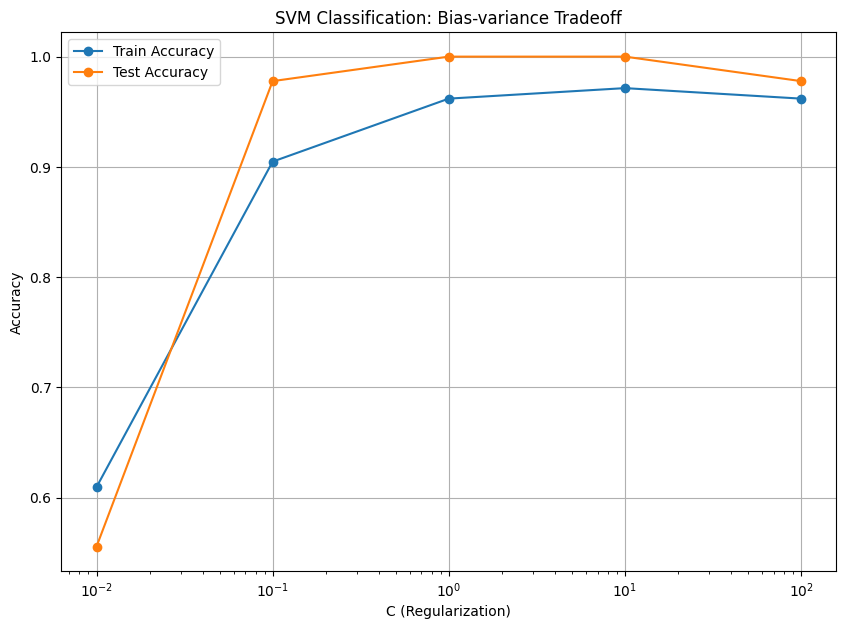


Linear Regression
Train MSE: 0.0
Test MSE: 0.0

SVR Regression with different C values:
C=0.01: Train MSE =2.4066, Test MSE = 3.1211
C=0.1: Train MSE =0.0978, Test MSE = 0.115
C=1: Train MSE =0.0111, Test MSE = 0.0152
C=10: Train MSE =0.0031, Test MSE = 0.0036
C=100: Train MSE =0.0031, Test MSE = 0.0036


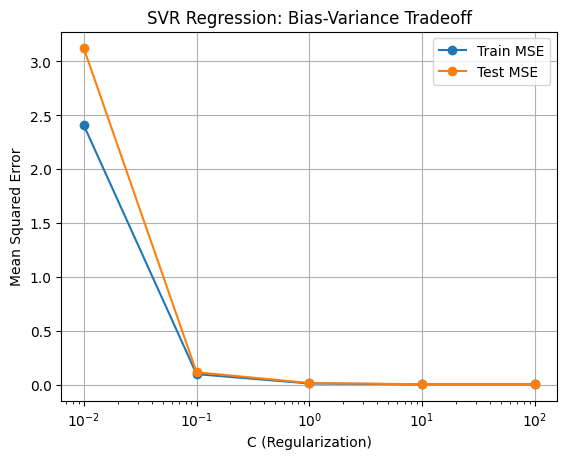

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data
y_classification = iris.target
y_regression = iris.data[:,2]

x_train_cls,x_test_cls,y_train_cls,y_test_cls = tts(x,y_classification,test_size = 0.3,random_state=42)
x_train_reg,x_test_reg,y_train_reg,y_test_reg = tts(x,y_regression,test_size = 0.3,random_state=42)

#Naive Bayes
nb = GaussianNB()
nb.fit(x_train_cls,y_train_cls)
y_pred_nb = nb.predict(x_test_cls)
train_acc_nb = accuracy_score(y_train_cls,nb.predict(x_train_cls))
test_acc_nb = accuracy_score(y_test_cls,y_pred_nb)

print("NAIVE BAYES Classification")
print("Train Accuracy:",round(train_acc_nb*100,2),"%")
print("Test Accuracy:",round(test_acc_nb*100,2),"%")
print("Classification Report(Naive Bayes):")
print(classification_report(y_test_cls,y_pred_nb,target_names=iris.target_names))


#SVM
c_values = [0.01,0.1,1,10,100]
train_acc_svm = []
test_acc_svm = []

print("\nSVM classification with different C Values:")
for c in c_values:
	svm = SVC(C=c,kernel='rbf',random_state=42)
	svm.fit(x_train_cls,y_train_cls)
	train_acc = accuracy_score(y_train_cls,svm.predict(x_train_cls))
	test_acc = accuracy_score(y_test_cls,svm.predict(x_test_cls))

	train_acc_svm.append(train_acc)
	test_acc_svm.append(test_acc)

	print(f"c={c} : Train Accuracy = {round(train_acc*100,2)}%, Test Accuracy = {round(test_acc *100,2)}%")


svm_best =SVC(C=1, kernel ='rbf', random_state=42)
svm_best.fit(x_train_cls,y_train_cls)
y_pred_svm = svm_best.predict(x_test_cls)

print("Classification Report (SVM, C=1):")
print(classification_report(y_test_cls,y_pred_svm, target_names=iris.target_names))

plt.figure(figsize = (10,7))
plt.plot(c_values, train_acc_svm , marker = 'o',label='Train Accuracy')
plt.plot(c_values,test_acc_svm, marker ='o',label ='Test Accuracy')
plt.xscale('log')
plt.xlabel("C (Regularization)")
plt.ylabel("Accuracy")
plt.title("SVM Classification: Bias-variance Tradeoff")
plt.legend()
plt.grid(True)
plt.savefig("SVM Classification.png")
plt.show()

#Regression -Linear Regression 
lr = LinearRegression()
lr.fit(x_train_reg,y_train_reg)

train_mse_lr = mean_squared_error(y_train_reg, lr.predict(x_train_reg))
test_mse_lr = mean_squared_error(y_test_reg, lr.predict(x_test_reg))

print("\nLinear Regression")
print("Train MSE:", round(train_mse_lr, 4))
print("Test MSE:", round(test_mse_lr, 4))


#Regression -SVR with Different c values

train_mse_svr = []
test_mse_svr = []

print("\nSVR Regression with different C values:")
for c in c_values:
	svr = SVR(C=c,kernel='rbf')
	svr.fit(x_train_reg,y_train_reg)
	train_mse = mean_squared_error(y_train_reg,svr.predict(x_train_reg))
	test_mse = mean_squared_error(y_test_reg, svr.predict(x_test_reg))
	train_mse_svr.append(train_mse)
	test_mse_svr.append(test_mse)
	print(f"C={c}: Train MSE ={round(train_mse,4)}, Test MSE = {round(test_mse,4)}")

plt.figure()
plt.plot(c_values, train_mse_svr, marker='o', label="Train MSE")
plt.plot(c_values, test_mse_svr, marker='o', label="Test MSE")
plt.xscale('log')
plt.xlabel("C (Regularization)")
plt.ylabel("Mean Squared Error")
plt.title("SVR Regression: Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.savefig("SVR Regression.png")
plt.show()

NAIVE BAYES Classification
Train Accuracy: 63.58 %
Test Accuracy: 57.19 %
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.56      0.79      0.65        87
           1       0.42      0.38      0.40        97
           2       0.77      0.56      0.65       108

    accuracy                           0.57       292
   macro avg       0.58      0.58      0.57       292
weighted avg       0.59      0.57      0.57       292


SVM classification with different C values:
C=0.01 : Train Accuracy = 35.1%, Test Accuracy = 29.79%
C=0.1 : Train Accuracy = 39.21%, Test Accuracy = 34.93%
C=1 : Train Accuracy = 49.93%, Test Accuracy = 46.92%
C=10 : Train Accuracy = 64.76%, Test Accuracy = 60.27%
C=100 : Train Accuracy = 67.25%, Test Accuracy = 66.1%

Classification Report (SVM, C=1):
              precision    recall  f1-score   support

           0       0.40      0.89      0.55        87
           1       0.42      0.29      0.34

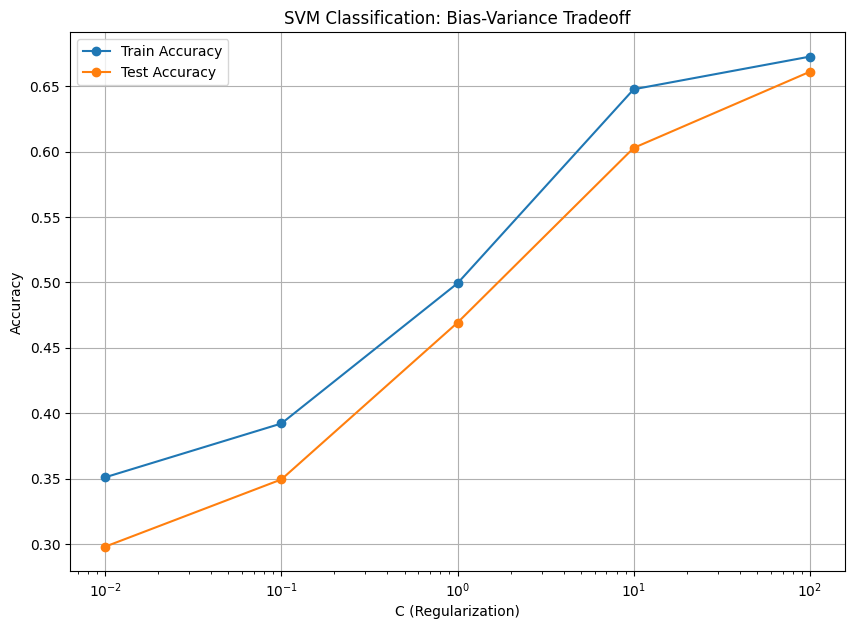


Linear Regression
Train MSE: 0.6335
Test MSE: 0.7417

SVR Regression with different C values:
C=0.01: Train MSE = 42.3918, Test MSE = 51.6866
C=0.1: Train MSE = 41.9382, Test MSE = 51.09
C=1: Train MSE = 37.9813, Test MSE = 46.535
C=10: Train MSE = 18.486, Test MSE = 23.4725
C=100: Train MSE = 11.9522, Test MSE = 15.1479


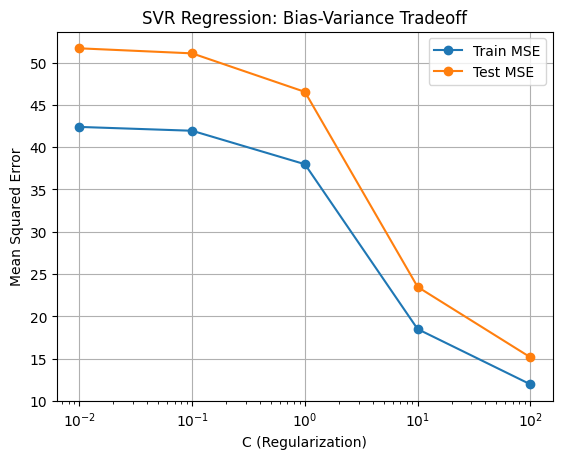

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv(r'/home/student/Music/25_dataset/gym.csv')

X = df.iloc[:, :-1]
y_continuous = df.iloc[:, -1]

# Encode categorical features
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Discretize target for classification
y_classification = pd.qcut(y_continuous, q=3, labels=False)

x_train_cls, x_test_cls, y_train_cls, y_test_cls = tts(X, y_classification, test_size=0.3, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = tts(X, y_continuous, test_size=0.3, random_state=42)

# Continue with the rest of the code (Naive Bayes, SVM, regression, etc.)


# --- Naive Bayes Classification ---
nb = GaussianNB()
nb.fit(x_train_cls, y_train_cls)
y_pred_nb = nb.predict(x_test_cls)

train_acc_nb = accuracy_score(y_train_cls, nb.predict(x_train_cls))
test_acc_nb = accuracy_score(y_test_cls, y_pred_nb)

print("NAIVE BAYES Classification")
print("Train Accuracy:", round(train_acc_nb * 100, 2), "%")
print("Test Accuracy:", round(test_acc_nb * 100, 2), "%")
print("Classification Report (Naive Bayes):")
print(classification_report(y_test_cls, y_pred_nb))

# --- SVM Classification with different C values ---
c_values = [0.01, 0.1, 1, 10, 100]
train_acc_svm = []
test_acc_svm = []

print("\nSVM classification with different C values:")
for c in c_values:
    svm = SVC(C=c, kernel='rbf', random_state=42)
    svm.fit(x_train_cls, y_train_cls)
    train_acc = accuracy_score(y_train_cls, svm.predict(x_train_cls))
    test_acc = accuracy_score(y_test_cls, svm.predict(x_test_cls))

    train_acc_svm.append(train_acc)
    test_acc_svm.append(test_acc)

    print(f"C={c} : Train Accuracy = {round(train_acc * 100, 2)}%, Test Accuracy = {round(test_acc * 100, 2)}%")

svm_best = SVC(C=1, kernel='rbf', random_state=42)
svm_best.fit(x_train_cls, y_train_cls)
y_pred_svm = svm_best.predict(x_test_cls)

print("\nClassification Report (SVM, C=1):")
print(classification_report(y_test_cls, y_pred_svm))

plt.figure(figsize=(10, 7))
plt.plot(c_values, train_acc_svm, marker='o', label='Train Accuracy')
plt.plot(c_values, test_acc_svm, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel("C (Regularization)")
plt.ylabel("Accuracy")
plt.title("SVM Classification: Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.savefig("SVM_Classification.png")
plt.show()

# --- Regression: Linear Regression ---
lr = LinearRegression()
lr.fit(x_train_reg, y_train_reg)

train_mse_lr = mean_squared_error(y_train_reg, lr.predict(x_train_reg))
test_mse_lr = mean_squared_error(y_test_reg, lr.predict(x_test_reg))

print("\nLinear Regression")
print("Train MSE:", round(train_mse_lr, 4))
print("Test MSE:", round(test_mse_lr, 4))

# --- Regression: SVR with different C values ---
train_mse_svr = []
test_mse_svr = []

print("\nSVR Regression with different C values:")
for c in c_values:
    svr = SVR(C=c, kernel='rbf')
    svr.fit(x_train_reg, y_train_reg)
    train_mse = mean_squared_error(y_train_reg, svr.predict(x_train_reg))
    test_mse = mean_squared_error(y_test_reg, svr.predict(x_test_reg))
    train_mse_svr.append(train_mse)
    test_mse_svr.append(test_mse)
    print(f"C={c}: Train MSE = {round(train_mse, 4)}, Test MSE = {round(test_mse, 4)}")

plt.figure()
plt.plot(c_values, train_mse_svr, marker='o', label="Train MSE")
plt.plot(c_values, test_mse_svr, marker='o', label="Test MSE")
plt.xscale('log')
plt.xlabel("C (Regularization)")
plt.ylabel("Mean Squared Error")
plt.title("SVR Regression: Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.savefig("SVR_Regression.png")
plt.show()


Naive Bayes Classification
Train Accuracy: 48.67%
Test Accuracy: 49.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53       709
           1       0.47      0.42      0.45       862
           2       0.43      0.62      0.51       379

    accuracy                           0.49      1950
   macro avg       0.49      0.52      0.50      1950
weighted avg       0.50      0.49      0.49      1950


SVM Classification with different C values:
C=0.01: Train Accuracy = 43.41%, Test Accuracy = 44.21%
C=0.1: Train Accuracy = 44.82%, Test Accuracy = 44.56%
C=1: Train Accuracy = 48.36%, Test Accuracy = 48.15%
C=10: Train Accuracy = 53.11%, Test Accuracy = 53.38%
C=100: Train Accuracy = 55.73%, Test Accuracy = 56.15%

Classification Report (SVM, C=1):
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       709
           1       0.47      0.68      0.56       862
        

/home/student/Music/0025mlm/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/student/Music/0025mlm/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/student/Music/0025mlm/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

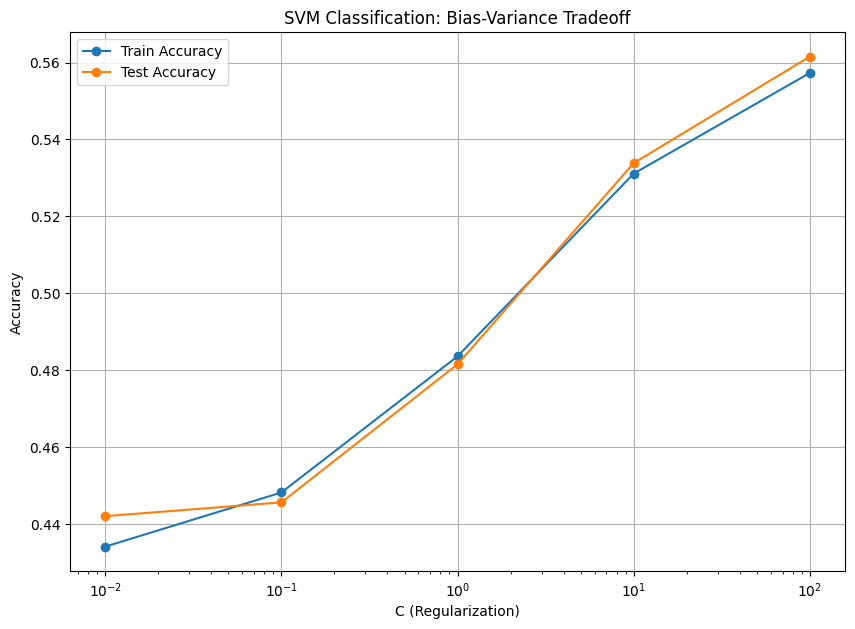


Linear Regression
Train MSE: 0.5505
Test MSE: 0.5049

SVR Regression with different C values:
C=0.01: Train MSE = 0.7690, Test MSE = 0.7241
C=0.1: Train MSE = 0.7273, Test MSE = 0.6902
C=1: Train MSE = 0.6526, Test MSE = 0.6221
C=10: Train MSE = 0.5650, Test MSE = 0.5310
C=100: Train MSE = 0.5372, Test MSE = 0.5072


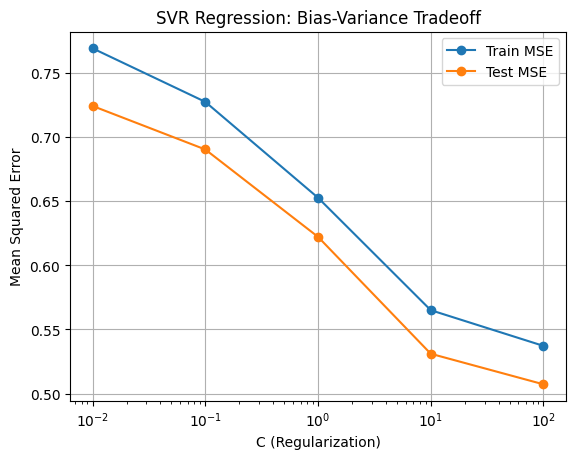

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt

def load_and_preprocess(filepath, target_col_index=-1, discretize_classes=3):
    """
    Load data, preprocess features and targets.
    Handles missing values and encodes categoricals.
    Optionally discretizes continuous target for classification.
    
    Returns:
        X (DataFrame): Features encoded numerically
        y_continuous (Series): Continuous target
        y_classification (Series): Discretized classification target
    """
    df = pd.read_csv(r'/home/student/Music/25_dataset/wine.csv')
    
    # Drop rows with missing target or features (or alternatively fillna)
    df.dropna(inplace=True)
    
    # Features and targets
    X = df.iloc[:, :target_col_index]
    y_continuous = df.iloc[:, target_col_index]
    
    # Encode categorical features
    cat_cols = X.select_dtypes(include=['object']).columns
    for col in cat_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    
    # Discretize target for classification if continuous and requested
    if np.issubdtype(y_continuous.dtype, np.number) and discretize_classes is not None:
        y_classification = pd.qcut(y_continuous, q=discretize_classes, labels=False, duplicates='drop')
    else:
        y_classification = y_continuous  # If already categorical or no discretization
    
    return X, y_continuous, y_classification

def split_data(X, y_cls, y_reg, test_size=0.3, random_state=42):
    """
    Split data for classification and regression tasks.
    """
    x_train_cls, x_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=test_size, random_state=random_state)
    x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=test_size, random_state=random_state)
    return (x_train_cls, x_test_cls, y_train_cls, y_test_cls), (x_train_reg, x_test_reg, y_train_reg, y_test_reg)

def run_naive_bayes(x_train, y_train, x_test, y_test):
    nb = GaussianNB()
    nb.fit(x_train, y_train)
    y_pred = nb.predict(x_test)
    train_acc = accuracy_score(y_train, nb.predict(x_train))
    test_acc = accuracy_score(y_test, y_pred)
    print("Naive Bayes Classification")
    print(f"Train Accuracy: {train_acc*100:.2f}%")
    print(f"Test Accuracy: {test_acc*100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return train_acc, test_acc

def run_svm_classification(x_train, y_train, x_test, y_test, c_values):
    train_accs, test_accs = [], []
    print("\nSVM Classification with different C values:")
    for c in c_values:
        svm = SVC(C=c, kernel='rbf', random_state=42)
        svm.fit(x_train, y_train)
        train_acc = accuracy_score(y_train, svm.predict(x_train))
        test_acc = accuracy_score(y_test, svm.predict(x_test))
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        print(f"C={c}: Train Accuracy = {train_acc*100:.2f}%, Test Accuracy = {test_acc*100:.2f}%")
    
    # Best model (e.g., C=1)
    best_c = 1
    svm_best = SVC(C=best_c, kernel='rbf', random_state=42)
    svm_best.fit(x_train, y_train)
    y_pred_best = svm_best.predict(x_test)
    print(f"\nClassification Report (SVM, C={best_c}):")
    print(classification_report(y_test, y_pred_best))

    # Plot accuracy vs C
    plt.figure(figsize=(10,7))
    plt.plot(c_values, train_accs, marker='o', label='Train Accuracy')
    plt.plot(c_values, test_accs, marker='o', label='Test Accuracy')
    plt.xscale('log')
    plt.xlabel("C (Regularization)")
    plt.ylabel("Accuracy")
    plt.title("SVM Classification: Bias-Variance Tradeoff")
    plt.legend()
    plt.grid(True)
    plt.savefig("SVM_Classification.png")
    plt.show()

def run_linear_regression(x_train, y_train, x_test, y_test):
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    train_mse = mean_squared_error(y_train, lr.predict(x_train))
    test_mse = mean_squared_error(y_test, lr.predict(x_test))
    print("\nLinear Regression")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    return train_mse, test_mse

def run_svr_regression(x_train, y_train, x_test, y_test, c_values):
    train_mse_list, test_mse_list = [], []
    print("\nSVR Regression with different C values:")
    for c in c_values:
        svr = SVR(C=c, kernel='rbf')
        svr.fit(x_train, y_train)
        train_mse = mean_squared_error(y_train, svr.predict(x_train))
        test_mse = mean_squared_error(y_test, svr.predict(x_test))
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        print(f"C={c}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")
    
    plt.figure()
    plt.plot(c_values, train_mse_list, marker='o', label='Train MSE')
    plt.plot(c_values, test_mse_list, marker='o', label='Test MSE')
    plt.xscale('log')
    plt.xlabel("C (Regularization)")
    plt.ylabel("Mean Squared Error")
    plt.title("SVR Regression: Bias-Variance Tradeoff")
    plt.legend()
    plt.grid(True)
    plt.savefig("SVR_Regression.png")
    plt.show()

def main():
    filepath = r'/home/student/Music/25_dataset/gym.csv'  # Update path as needed
    X, y_continuous, y_classification = load_and_preprocess(filepath)

    (x_train_cls, x_test_cls, y_train_cls, y_test_cls), (x_train_reg, x_test_reg, y_train_reg, y_test_reg) = split_data(
        X, y_classification, y_continuous)

    c_values = [0.01, 0.1, 1, 10, 100]

    # Classification
    run_naive_bayes(x_train_cls, y_train_cls, x_test_cls, y_test_cls)
    run_svm_classification(x_train_cls, y_train_cls, x_test_cls, y_test_cls, c_values)

    # Regression
    run_linear_regression(x_train_reg, y_train_reg, x_test_reg, y_test_reg)
    run_svr_regression(x_train_reg, y_train_reg, x_test_reg, y_test_reg, c_values)

if __name__ == "__main__":
    main()
